## Challenge Set 1
##### Topic:        Explore MTA turnstile data
##### Date:         06/29/2016
##### Name:        Adam Levin
##### Worked with:  None

**Challenge 1**

In [1]:
!touch data.txt
!curl 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160625.txt' >> data.txt
!curl 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160618.txt' >> data.txt
!curl 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160611.txt' >> data.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  6905k      0 --:--:--  0:00:03 --:--:-- 7736k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  9317k      0 --:--:--  0:00:02 --:--:-- 9322k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  5561k      0 --:--:--  0:00:04 --:--:-- 5564k


In [2]:
from csv import reader

In [3]:
d = {}
with open('data.txt','r') as f:
    for u,line in enumerate(reader(f)):
        if u==0:
            labels = [cell.strip() for cell in line]
        if u>=1:
            if [cell.strip() for cell in line]==labels: ## exclude the header of the each chuck of data in file
                continue
            _d = {labels[i]:line[i].strip() for i in range(len(labels))}
            d.setdefault((_d['C/A'],_d['UNIT'],_d['SCP'],_d['STATION']),[]).append([_d['LINENAME'],
                                _d['DIVISION'],_d['DATE'],_d['TIME'],_d['DESC'],_d['ENTRIES'],_d['EXITS']])

In [4]:
print d.keys()[0]
for value in d[d.keys()[0]][0:10]:
    print value

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
['A', 'IND', '06/18/2016', '01:00:00', 'REGULAR', '0007345027', '0002914431']
['A', 'IND', '06/18/2016', '05:00:00', 'REGULAR', '0007345099', '0002914457']
['A', 'IND', '06/18/2016', '09:00:00', 'REGULAR', '0007345458', '0002914492']
['A', 'IND', '06/18/2016', '13:00:00', 'REGULAR', '0007345760', '0002914579']
['A', 'IND', '06/18/2016', '17:00:00', 'REGULAR', '0007346009', '0002914659']
['A', 'IND', '06/18/2016', '21:00:00', 'REGULAR', '0007346223', '0002914757']
['A', 'IND', '06/19/2016', '01:00:00', 'REGULAR', '0007346373', '0002914824']
['A', 'IND', '06/19/2016', '05:00:00', 'REGULAR', '0007346411', '0002914855']
['A', 'IND', '06/19/2016', '09:00:00', 'REGULAR', '0007346540', '0002914888']
['A', 'IND', '06/19/2016', '13:00:00', 'REGULAR', '0007346713', '0002914938']


**Challenge 2**

In [5]:
from datetime import datetime

In [6]:
d_2 = {key: [[datetime.strptime(value[2]+value[3],'%m/%d/%Y%X'),int(value[6])] for value in d[key]] for key in d.iterkeys()}

In [7]:
d_2_ = {}
for key in d_2: 
    diffs = [0]
    for u,value in enumerate(sorted(d_2[key],key=lambda x: x[0])):
        if u!=0:
            diffs.append(value[1]-running)
        running = value[1]
    d_2_[key] = [[k[0],diffs[u]] for u,k in enumerate(sorted(d_2[key],key=lambda x: x[0]))]

let's look at some values

In [8]:
values = [entry[1] for key in d_2_ for entry in d_2_[key]]

In [9]:
sorted(values)[0:10]

[-1610668464,
 -1325652702,
 -1023433815,
 -854727895,
 -552184643,
 -302152431,
 -134223057,
 -134210031,
 -9905190,
 -7958669]

let's remove all the negative values

In [10]:
d_2 = {}
for key in d_2_.keys():
    d_2[key] = [value for value in d_2_[key] if value[1]>=0]

In [11]:
values = [entry[1] for key in d_2 for entry in d_2[key]]
sorted(values)[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

now let's look at the big values

In [12]:
sorted(values,reverse=True)[0:10]

[1906298823,
 1604316759,
 854728520,
 725724,
 488541,
 488515,
 32919,
 22607,
 8340,
 7200]

judgment call: remove all entries with values over 50,000

In [13]:
d2 = {}
for key in d_2.keys():
    d2[key] = [value for value in d_2[key] if value[1] < 50000]

In [14]:
values = [entry[1] for key in d2 for entry in d2[key]]
sorted(values,reverse=True)[0:10]

[32919, 22607, 8340, 7200, 5688, 5414, 5407, 5266, 5223, 5206]

the dictionary d2 is my answer

**Challenge 3**

In [15]:
for key in d2.iterkeys(): ## make sure times are sorted
    assert d2[key] == sorted(d2[key],key=lambda x: x[0])

In [16]:
d3 = {}
for key in d2.iterkeys():
    for value in d2[key]:
        d3[key][value[0].date()] = d3.setdefault(key,{}).setdefault(value[0].date(),0) + value[1]

In [17]:
for u,key in enumerate(d3.keys()):
    if u<1:
        print key
        for i,key1 in enumerate(d3[key].keys()):
            if i<10:
                print key1,d3[key][key1]

('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')
2016-06-21 307
2016-06-15 312
2016-06-20 386
2016-06-14 289
2016-06-19 415
2016-06-24 400
2016-06-13 310
2016-06-18 358
2016-06-07 391
2016-06-12 201


**Challenge 4**

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

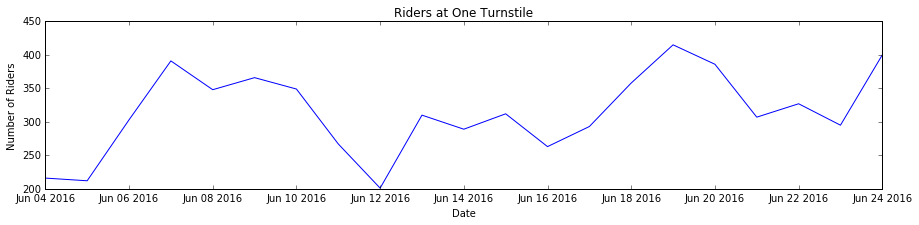

In [29]:
for u,key in enumerate(d3.keys()):
    if u==0:
        dates = sorted(d3[key].keys())
        counts = [d3[key][date] for date in dates]
        plt.figure(figsize=(15,3))
        plt.plot(dates,counts)
        plt.ylabel('Number of Riders')
        plt.xlabel('Date')
        plt.title('Riders at One Turnstile')

**Challenge 5**

In [30]:
d5 = {}
for key in d3:
    for key1 in d3[key]:
        d5[tuple([key[0],key[1],key[3]])][key1] = d5.setdefault(tuple([key[0],key[1],key[3]]),{}).setdefault(key1,0) + d3[key][key1] 

In [31]:
for u,key in enumerate(d5.keys()):
    if u==3:
        print key
        for i,key1 in enumerate(d5[key].keys()):
            if i<10:
                print key1,d5[key][key1]

('R232', 'R176', '33 ST')
2016-06-21 9460
2016-06-15 10228
2016-06-20 9102
2016-06-14 9821
2016-06-19 3839
2016-06-24 9157
2016-06-13 9323
2016-06-18 4679
2016-06-07 9598
2016-06-12 3449


**Challenge 6**

In [32]:
d6 = {}
for key in d5:
    for key1 in d5[key]:
        d6[key[2]][key1] = d6.setdefault(key[2],{}).setdefault(key1,0) + d5[key][key1] 

In [33]:
for u,key in enumerate(d6.keys()):
    if u==0:
        print key
        for i,key1 in enumerate(d6[key].keys()):
            if i<10:
                print key1,d6[key][key1]

CYPRESS AV
2016-06-21 2703
2016-06-15 2742
2016-06-20 2621
2016-06-14 2684
2016-06-19 1276
2016-06-24 2746
2016-06-13 2657
2016-06-18 1806
2016-06-07 3023
2016-06-12 1416


**Challenge 7**

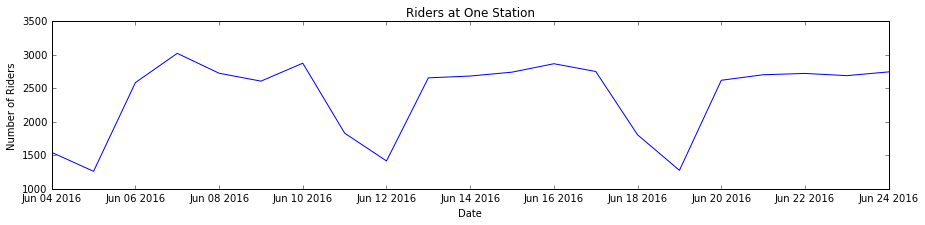

In [34]:
for u,key in enumerate(d6.keys()):
    if u==0:
        dates = sorted(d6[key].keys())
        counts = [d6[key][date] for date in dates]
        plt.figure(figsize=(15,3))
        plt.plot(dates,counts)
        plt.ylabel('Number of Riders')
        plt.xlabel('Date')
        plt.title('Riders at One Station')

**Challenge 8**

In [25]:
_d = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

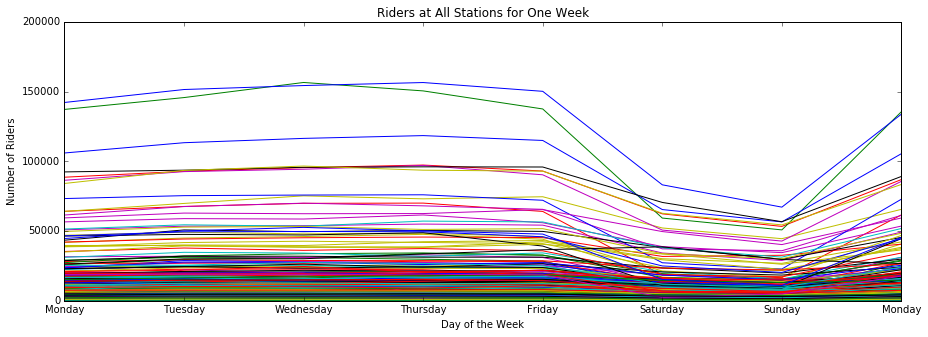

In [35]:
plt.figure(figsize=(15,5))
for u,key in enumerate(d6.keys()):
    dates = sorted(d6[key].keys())[2:10]
    counts = [d6[key][date] for date in dates]
    plt.plot(dates,counts)
d_of_week = [_d[date.weekday()] for date in dates]
plt.xticks(dates, d_of_week)
plt.ylim(ymax = 200000, ymin = 0)
plt.ylabel('Number of Riders')
plt.xlabel('Day of the Week')
plt.title('Riders at All Stations for One Week')
plt.show()

**Challenge 9**

In [27]:
d9 = {}
for key in d6:
    for key1 in d6[key]:
        d9[key] = d9.setdefault(key,0) + d6[key][key1] 

In [28]:
for station in sorted(d9, key = lambda x: d9[x], reverse=True)[0:10]:
    print station

34 ST-PENN STA
GRD CNTRL-42 ST
34 ST-HERALD SQ
14 ST-UNION SQ
TIMES SQ-42 ST
86 ST
23 ST
42 ST-PORT AUTH
FULTON ST
125 ST


**Challenge 10**

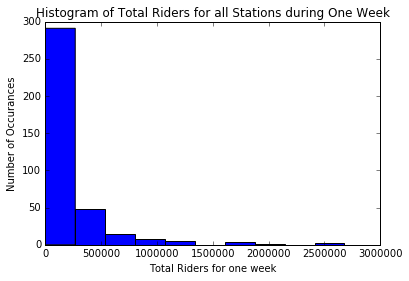

In [36]:
values = [d9[key] for key in d9]
plt.hist(values)
plt.ylabel('Number of Occurances')
plt.xlabel('Total Riders for one week')
plt.title('Histogram of Total Riders for all Stations during One Week')

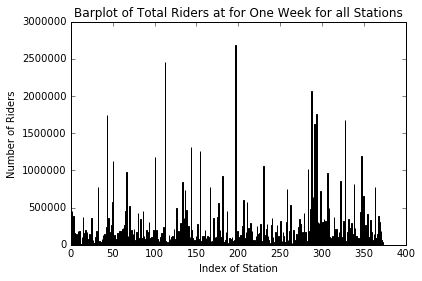

In [37]:
indices = range(len(values))
plt.bar(indices, values)
plt.ylabel('Number of Riders')
plt.xlabel('Index of Station')
plt.title('Barplot of Total Riders at for One Week for all Stations')